<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

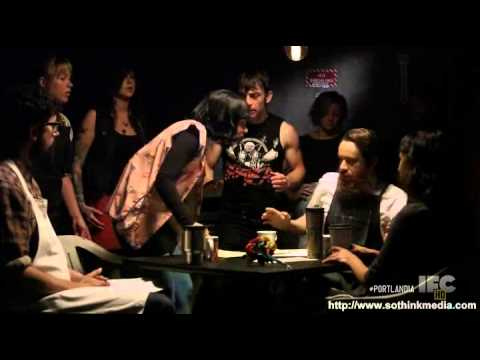

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/afroman/Documents/Projects/Unit 4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [4]:
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")

In [5]:
import pandas as pd

url = "./data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [6]:
# create a function to tokenize things
def Tokenize(text):
    
    import re

    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens = tokens.lower()

    return tokens
    

In [7]:
# test tokenize function
Tokenize(shops['full_review_text'][0])

'   checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes  i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas '

In [8]:
# apply tokenize function to the reviews and create a new column for tokens
shops['tokens'] = shops['full_review_text'].apply(Tokenize)
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere ever...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in aust...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating ho...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcr...


In [21]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee',' ', '  ', '   ', '-', 'im'])

In [22]:
tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(shops['tokens'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)


shops['stop_tokens'] = tokens

In [23]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,stop_tokens,good_bad_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere ever...,"[checkin, love, love, loved, atmosphere, corne...",good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in aust...,"[listed, date, night, austin, ambiance, austin...",good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the ...,"[checkin, listed, brunch, spots, loved, eclect...",good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating ho...,"[cool, decor, good, drinks, nice, seating, ove...",bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcr...,"[checkin, located, northcross, mall, shopping,...",good


In [24]:
# function to change star rating to good or bad. 1-3 is bad 4 or 5 is good
def GoodBad(rating):
    
    good_bad = []
    
    for i in rating:
        
        if int(i[1]) == 4 or int(i[1]) == 5:
            good_bad.append('good')

        else:
            good_bad.append('bad')

    return good_bad

In [25]:
# create the column for the good bad differentiation
shops['good_bad_rating'] = GoodBad(shops['star_rating'])
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,stop_tokens,good_bad_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,checkin love love loved the atmosphere ever...,"[checkin, love, love, loved, atmosphere, corne...",good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,listed in date night austin ambiance in aust...,"[listed, date, night, austin, ambiance, austin...",good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,checkin listed in brunch spots i loved the ...,"[checkin, listed, brunch, spots, loved, eclect...",good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,very cool decor good drinks nice seating ho...,"[cool, decor, good, drinks, nice, seating, ove...",bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,checkin they are located within the northcr...,"[checkin, located, northcross, mall, shopping,...",good


In [26]:
# get count of good shops and bad shops
shops['good_bad_rating'].value_counts()

good    6140
bad     1476
Name: good_bad_rating, dtype: int64

In [27]:
# split df into one for good shops and one for bad shops
bad_shops = shops[shops['good_bad_rating'] == 'bad']
good_shops = shops[shops['good_bad_rating'] == 'good']

# check that they split correctly
print(bad_shops.shape)
print(good_shops.shape)

(1476, 6)
(6140, 6)


In [28]:
def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    from collections import Counter

    word_counts = Counter()
    
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [29]:
# get token counts
wcb = count(bad_shops['stop_tokens'])
wcg = count(good_shops['stop_tokens'])

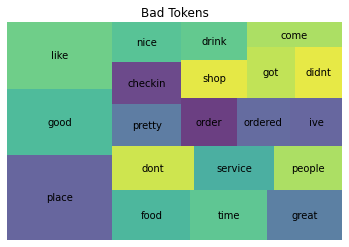

In [42]:
import squarify
import matplotlib.pyplot as plt

wcb_top20 = wcb[wcb['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Bad Tokens')
plt.show()

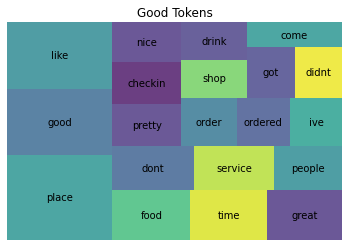

In [43]:
import squarify
import matplotlib.pyplot as plt

wcg_top20 = wcg[wcg['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Good Tokens')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [80]:
def common_words(list1, list2):
    result = False
    commonality = []
    
    for x in list1:
        
        for y in list2:
            
            if x==y:
                result = True
                commonality.append(x)
                break
            
            else:
                result = False
                
        
    
        
    return commonality

In [83]:
similar_words = common_words(wcg_top20['word'], wcb_top20['word'])
similar_words

['place',
 'great',
 'good',
 'like',
 'checkin',
 'time',
 'nice',
 'shop',
 'food',
 'ive',
 'people']

In [123]:
wcg_top20[['word', 'pct_total']]

,word,pct_total
96,place,0.015861
141,great,0.012696
178,good,0.011383
197,like,0.008133
53,austin,0.007239
3,love,0.006342
38,checkin,0.005901
146,friendly,0.005375
400,time,0.005169
56,nice,0.005129


In [130]:
words_similar = pd.DataFrame()
for i, words in enumerate((similar_words)):
    words_similar.append(wcg_top20[wcg_top20['word']==similar_words[i]])

words_similar.shape

(0, 0)

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interest in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

